# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2  

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


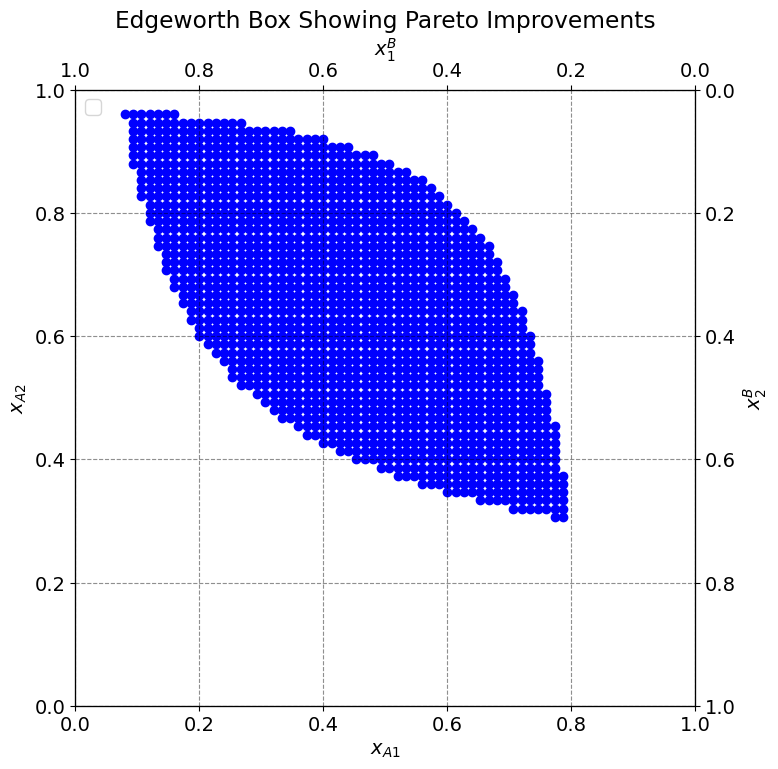

In [6]:
# code for solving the model (remember documentation and comments)
from inauguralproject import ExchangeEconomyClass

model=ExchangeEconomyClass()

# Initialize the model
model = ExchangeEconomyClass()

# Define the range of combinations
N = 75
x_range = np.linspace(0, 1, N + 1)

# Initialize lists to store valid combinations
valid_xA1 = []
valid_xA2 = []

# Calculate utility at the endowment point
u_A_endowment = model.utility_A(model.par.w1A, model.par.w2A)
u_B_endowment = model.utility_B(model.par.w1B, model.par.w2B)

# Iterate over all combinations
for xA1 in x_range:
    for xA2 in x_range:
        # Calculate utility for player A and B
        u_A = model.utility_A(xA1, xA2)
        u_B = model.utility_B(1 - xA1, 1 - xA2)  # xB1 = 1 - xA1, xB2 = 1 - xA2
        
        # Check if the combination satisfies Pareto improvement
        if u_A >= u_A_endowment and u_B >= u_B_endowment:
            valid_xA1.append(xA1)
            valid_xA2.append(xA2)

plt.figure(figsize=(8, 8))

# Scatter plot for Pareto improvements for A
plt.scatter(valid_xA1, valid_xA2, color='blue', label='Pareto Improvements for A')

# Setting primary axis labels for A's allocations
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

# Setting the limits for the primary axes from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Creating secondary axes for B's allocations
ax2 = plt.twiny()  # Create a second x-axis sharing the same y-axis
ax3 = plt.twinx()  # Create a second y-axis sharing the same x-axis

# Setting the limits for the secondary axes from 0 to 1
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# Setting labels for B's allocations, which are complements to A's allocations
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')

# Inverting the direction of the secondary axes to reflect B's perspective
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box Showing Pareto Improvements')
plt.grid(True)
plt.legend(loc='upper left')

plt.show()

# Question 2

Explain your code and procedure

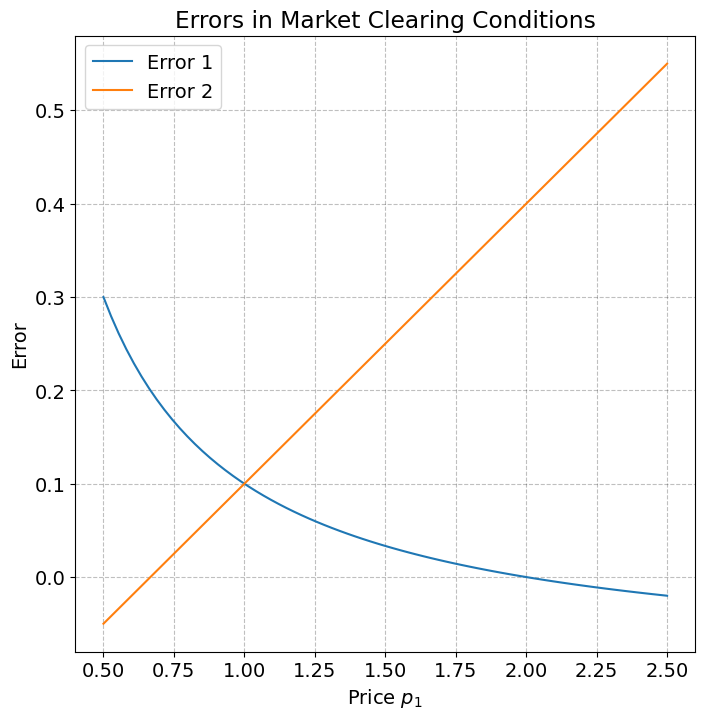

In [7]:
# Initialize the model
model = ExchangeEconomyClass()

# Define the set of prices P1
N = 75
P1 = np.linspace(0.5, 2.5, N)

# Initialize lists to store errors
errors_1 = []
errors_2 = []

# Iterate over each price in P1
for p1 in P1:
    # Calculate demand quantities for both players
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)
    
    # Calculate errors
    error_1 = x1A - model.par.w1A + x1B - (1 - model.par.w1A)
    error_2 = x2A - model.par.w2A + x2B - (1 - model.par.w2A)
    
    # Append errors to the list
    errors_1.append(error_1)
    errors_2.append(error_2)

# Plot the errors
plt.figure(figsize=(8, 8))
plt.plot(P1, errors_1, label='Error 1')
plt.plot(P1, errors_2, label='Error 2')
plt.xlabel('Price $p_1$')
plt.ylabel('Error')
plt.title('Errors in Market Clearing Conditions')
plt.grid(True)
plt.legend()
plt.show()

# Question 3

Explain your code and procedure

In [12]:
from scipy.optimize import minimize_scalar
from inauguralproject import ExchangeEconomyClass

# Initialize the model

model = ExchangeEconomyClass()

def market_clearing_error(p1):
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)
    error_1 = x1A - model.par.w1A + x1B - (1 - model.par.w1A)
    error_2 = x2A - model.par.w2A + x2B - (1 - model.par.w2A)
    # Minimize the sum of absolute values of the errors
    return abs(error_1) + abs(error_2)

result = minimize_scalar(market_clearing_error, bounds=(0.5, 2.5), method='bounded')

result

 message: Solution found.
 success: True
  status: 0
     fun: 0.18989794855684922
       x: 0.8164973428624008
     nit: 12
    nfev: 12

ADD CONCISE CONLUSION.

# Question 4

4.1

In [8]:
import numpy as np
from inauguralproject import ExchangeEconomyClass

# Initialize the model
model = ExchangeEconomyClass()

# Define the set of prices P1
N = 75
P1 = np.linspace(0.5, 2.5, N + 1)

# Initializes variables to store the optimal price and allocation
optimal_price = None
optimal_allocation = None
max_utility = float('-inf')

# We now iterate over each price in P1
for p1 in P1:
    # Calculating the demand quantities for player B
    x1B, x2B = model.demand_B(p1)
    
    # Calculating utility for player A
    utility_A = model.utility_A(1 - x1B, 1 - x2B)
    
    # Check if utility is maximized
    if utility_A > max_utility:
        max_utility = utility_A
        optimal_price = p1
        optimal_allocation = (1 - x1B, 1 - x2B)

print(f"The optimal price chosen by player A: {optimal_price:.4f}")
print(f"The optimal allocation for player A: {optimal_allocation}")


The optimal price chosen by player A: 1.3533
The optimal allocation for player A: (0.31888341543513954, 0.598)


4.2

In [11]:
import numpy as np
from scipy.optimize import minimize
from inauguralproject import ExchangeEconomyClass

# Initialize the model
model = ExchangeEconomyClass()

# Define the objective function to maximize A's utility
def objective_function(p1):
    # Calculate demand quantities for player B
    x1B, x2B = model.demand_B(p1)
    
    # Calculate A's utility
    utility_A = model.utility_A(1 - x1B, 1 - x2B)
    
    return -utility_A  # We minimize the negative utility to maximize the utility

# Initial guess for the price
initial_guess = 1.0

# Define constraints (price should be greater than 0)
constraints = [{'type': 'ineq', 'fun': lambda p1: p1}]

# Optimize the objective function
result = minimize(objective_function, initial_guess, constraints=constraints)

# Extract the optimal price
optimal_price = result.x[0]

# Calculate the optimal allocation for player A
x1B_optimal, x2B_optimal = model.demand_B(optimal_price)
x1A_optimal = 1 - x1B_optimal
x2A_optimal = 1 - x2B_optimal

# Print the results
print("Optimal Price (p1):", optimal_price)
print("Optimal Allocation for Player A:")
print("x1A:", x1A_optimal)
print("x2A:", x2A_optimal)


Optimal Price (p1): 1.3649136379774853
Optimal Allocation for Player A:
x1A: 0.32013724939426114
x2A: 0.5968419695355848
